In [35]:
# Copyright Elasticsearch B.V. and/or licensed to Elasticsearch B.V. under one
# or more contributor license agreements. Licensed under the Elastic License;
# you may not use this file except in compliance with the Elastic License.

In [50]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import skmultiflow
import sklearn.datasets
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
from incremental_learning.job import train, update, evaluate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sine function with gap

In [37]:
dataset_name = 'classification-2d'

x = np.random.random(5000).reshape((-1,2))
y = x[:,1] < (np.sin(x[:,0]*np.pi/2*4)+1)/2
is_training = (x[:, 0] < 0.3) | (x[:,0] > 0.7) | (x[:,1] < 0.3) | (x[:,1] > 0.7)

D = pd.DataFrame(data=x, columns=['x1', 'x2'])
D['target'] = y
D['target'].replace({True:'true', False:'false'}, inplace=True)
D['training'] = is_training

D_train = D.where(D['training'] == True).dropna()
D_update = D.where(D['training'] == False).dropna()

Text(0.5, 1.0, 'Update dataset')

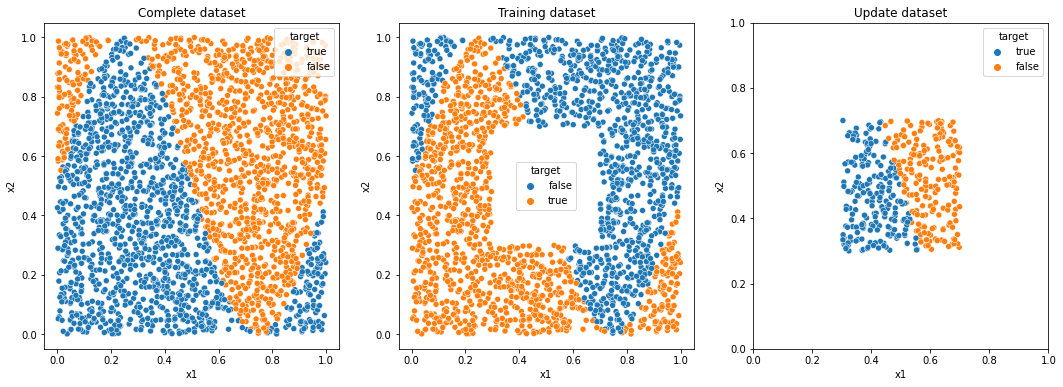

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
# fig.suptitle('1 row x 2 columns axes with no data')
sns.scatterplot(data=D, x='x1', y='x2', hue='target', ax=axes[0])
axes[0].set_title('Complete dataset')
sns.scatterplot(data=D_train, x='x1', y='x2', hue='target', ax=axes[1])
axes[1].set_title('Training dataset')
sns.scatterplot(data=D_update, x='x1', y='x2', hue='target', ax=axes[2])
axes[2].set_xlim([0,1])
axes[2].set_ylim([0,1])
axes[2].set_title('Update dataset')

In [39]:
job1 = train(dataset_name, D_train[['x1','x2', 'target']])
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplv8_oase --config /tmp/tmpnhqx2s3h --output /tmp/tmpaz598os5 --persist /tmp/tmpsd0r1w1o; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplv8_oase --config /tmp/tmpnhqx2s3h --output /tmp/tmpaz598os5 --persist /tmp/tmpsd0r1w1o; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-07-09 08:55:27,867117 UTC [17443] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-07-09 08:55:27,867168 UTC [17443] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-07-09 08:55:27,867178 UTC [17443] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-07-09 08:55:27,868298 UTC [17443] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-07-09 08:55:27,869725 UTC [17443] DEBUG CDataFrameAnalyzer.cc@102 Received 2090 rows 2021-07-09 08:55:31,600257 UTC [17443] INFO CBoostedTreeImpl.cc@261 Exiting hyperparameter optimisation loop early 2021-07-09 08:55:31,977155 UTC [17443] INFO Main.cc@248 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":21663481} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":381251} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":3804} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":32} ] 2021-07-09 08:55:31,977226 UTC [17443] DEBUG Main.cc@253 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

In [40]:
job2 = evaluate(dataset_name=dataset_name, dataset=D[['x1','x2', 'target']], original_job=job1)
job2.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpzlzflz8e --config /tmp/tmphyun5fub --output /tmp/tmpf8xa9djl --restore /tmp/tmpqld70kpf; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpzlzflz8e --config /tmp/tmphyun5fub --output /tmp/tmpf8xa9djl --restore /tmp/tmpqld70kpf; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-07-09 08:55:33,195495 UTC [19115] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-07-09 08:55:33,195532 UTC [19115] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-07-09 08:55:33,195542 UTC [19115] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-07-09 08:55:33,195877 UTC [19115] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-07-09 08:55:33,199563 UTC [19115] DEBUG CDataFrameAnalyzer.cc@102 Received 2709 rows 2021-07-09 08:55:33,207900 UTC [19115] INFO Main.cc@248 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":22234928} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":134226} ] 2021-07-09 08:55:33,207926 UTC [19115] DEBUG Main.cc@253 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[],""data_sum ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

In [41]:
D['predictions'] = job2.get_predictions()

In [42]:
job3 = update(dataset_name=dataset_name, dataset=D_update[['x1','x2', 'target']], original_job=job1)
job3.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpgoythx91 --config /tmp/tmparxr1v5b --output /tmp/tmpc3ko8k4y --restore /tmp/tmp_r0zp13q; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpgoythx91 --config /tmp/tmparxr1v5b --output /tmp/tmpc3ko8k4y --restore /tmp/tmp_r0zp13q; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-07-09 08:55:39,193315 UTC [20544] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-07-09 08:55:39,193365 UTC [20544] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-07-09 08:55:39,193376 UTC [20544] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-07-09 08:55:39,193820 UTC [20544] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-07-09 08:55:39,197373 UTC [20544] DEBUG CDataFrameAnalyzer.cc@102 Received 619 rows 2021-07-09 08:55:39,216219 UTC [20544] INFO Main.cc@248 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":6425577} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":174597} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":12} ] 2021-07-09 08:55:39,216276 UTC [20544] DEBUG Main.cc@253 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

In [43]:
job4 = evaluate(dataset_name=dataset_name, dataset=D[['x1','x2', 'target']], original_job=job3)
job4.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw9zbmuif --config /tmp/tmpogc7oes0 --output /tmp/tmpiwt1irq9 --restore /tmp/tmp8vldq9fv; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw9zbmuif --config /tmp/tmpogc7oes0 --output /tmp/tmpiwt1irq9 --restore /tmp/tmp8vldq9fv; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-07-09 08:55:44,110037 UTC [21922] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-07-09 08:55:44,110116 UTC [21922] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-07-09 08:55:44,110135 UTC [21922] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-07-09 08:55:44,110693 UTC [21922] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-07-09 08:55:44,115427 UTC [21922] DEBUG CDataFrameAnalyzer.cc@102 Received 2561 rows 2021-07-09 08:55:44,124310 UTC [21922] INFO Main.cc@248 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":22106034} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":126042} ] 2021-07-09 08:55:44,124341 UTC [21922] DEBUG Main.cc@253 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/prototypes [incremental-learning-datasets L|●3✚ 5…1⚑ 6] 10:55 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""false"",""pred ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""target_prediction"":""true"",""predi ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[],""data_sum ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

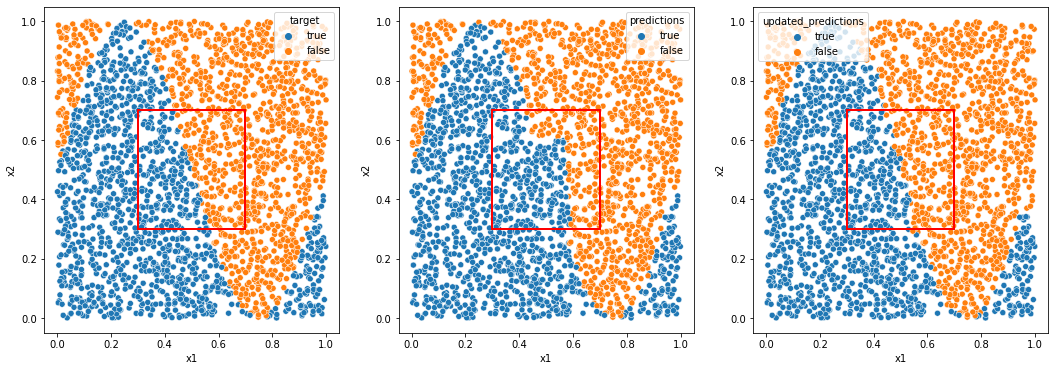

In [54]:
def plot_sinus_values(ax, column, dataset):
    sns.scatterplot(data=dataset, x='x1', y='x2', hue=column, ax=ax)
    ax.add_patch(patches.Rectangle(xy=(0.3, 0.3), width=0.4, height=0.4, linewidth=2, color='red', fill=False))
D['updated_predictions'] = job4.get_predictions()
fig, axes = plt.subplots(1, 3, figsize=(18,6))
plot_sinus_values(axes[0], 'target', D)
plot_sinus_values(axes[1], 'predictions', D)
plot_sinus_values(axes[2], 'updated_predictions', D)

## Three circles

In [95]:
x = np.random.random(5000).reshape((-1,2))
y = ((x[:,1]-0.5)**2+(x[:,0]-0.5)**2 < 0.5**2) & ((x[:,1]-0.5)**2+(x[:,0]-0.5)**2 > 0.3**2)
#(np.sin(x[:,0]*np.pi/2*4)+1)/2
is_training = (x[:,0]//0.25 + x[:,1]//0.25)%2 == 1

D = pd.DataFrame(data=x, columns=['x1', 'x2'])
D['target'] = y
D['target'].replace({True:'true', False:'false'}, inplace=True)
D['training'] = is_training

D_train = D.where(D['training'] == True).dropna()
D_update = D.where(D['training'] == False).dropna()

Text(0.5, 1.0, 'Update dataset')

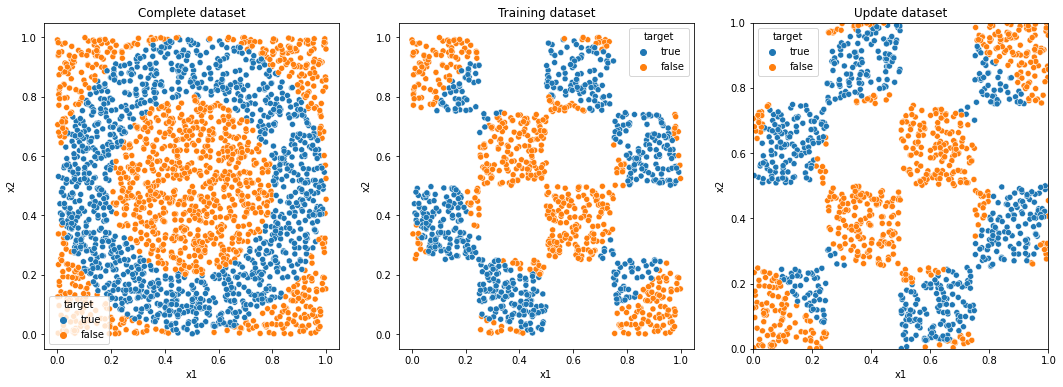

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
# fig.suptitle('1 row x 2 columns axes with no data')
sns.scatterplot(data=D, x='x1', y='x2', hue='target', ax=axes[0])
axes[0].set_title('Complete dataset')
sns.scatterplot(data=D_train, x='x1', y='x2', hue='target', ax=axes[1])
axes[1].set_title('Training dataset')
sns.scatterplot(data=D_update, x='x1', y='x2', hue='target', ax=axes[2])
axes[2].set_xlim([0,1])
axes[2].set_ylim([0,1])
axes[2].set_title('Update dataset')

In [97]:
job1 = train(dataset_name, D_train[['x1','x2', 'target']], verbose=False)
job1.wait_to_complete()

True

In [98]:
job2 = evaluate(dataset_name=dataset_name, dataset=D[['x1','x2', 'target']], original_job=job1, verbose=False)
job2.wait_to_complete()

True

In [99]:
D['predictions'] = job2.get_predictions()

In [100]:
job3 = update(dataset_name=dataset_name, dataset=D_update[['x1','x2', 'target']], original_job=job1, verbose=False)
job3.wait_to_complete()

True

In [101]:
job4 = evaluate(dataset_name=dataset_name, dataset=D[['x1','x2', 'target']], original_job=job3, verbose=False)
job4.wait_to_complete()

True

In [111]:
def plot_checkerboard(ax, column, dataset):
    sns.scatterplot(data=dataset, x='x1', y='x2', hue=column, ax=ax)
    for i in range(4):
        for j in range(4):
            if (i+j)%2 ==0:
                ax.add_patch(patches.Rectangle(xy=(0.25*i, 0.25*j), width=0.25, height=0.25, 
                                   linewidth=0, color='grey', fill=True, alpha=0.4, zorder=-1))
                
def plot_misclassifications(ax, column, dataset):
    sns.scatterplot(data=dataset, x='x1', y='x2', hue=(dataset[column]!=dataset['target']), 
                    ax=ax, palette=['grey', 'red'])
    for i in range(4):
        for j in range(4):
            if (i+j)%2 ==0:
                ax.add_patch(patches.Rectangle(xy=(0.25*i, 0.25*j), width=0.25, height=0.25, 
                                   linewidth=0, color='grey', fill=True, alpha=0.4, zorder=-1))

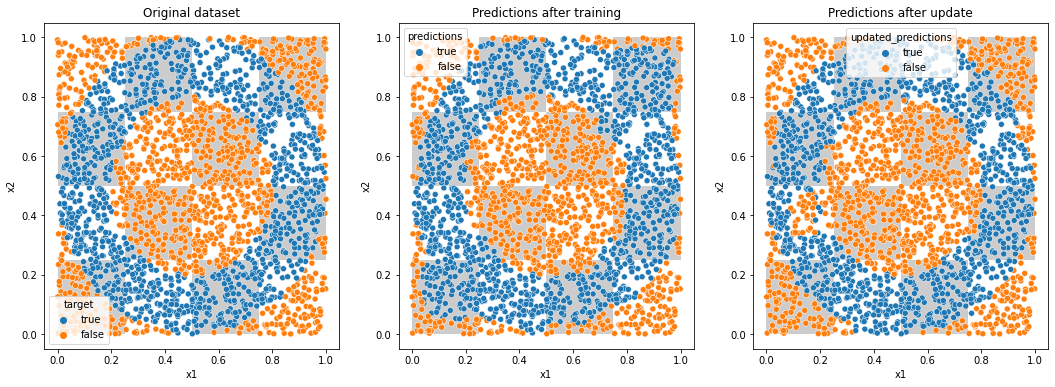

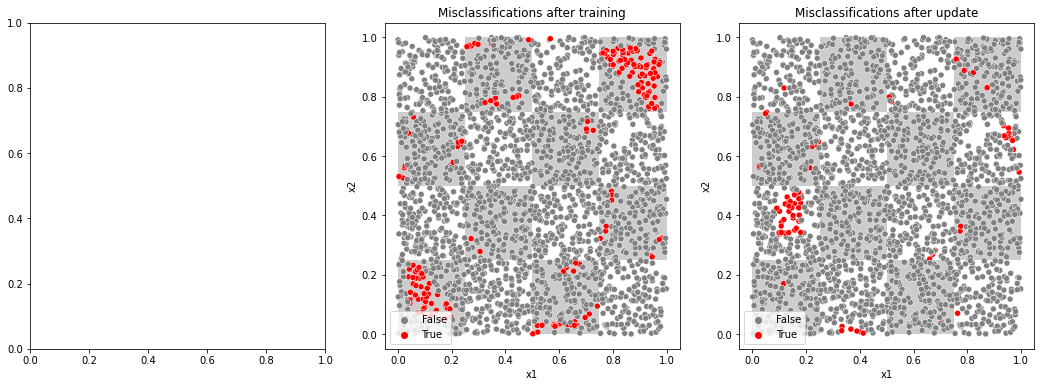

In [114]:
D['updated_predictions'] = job4.get_predictions()
fig, axes = plt.subplots(1, 3, figsize=(18,6))
plot_checkerboard(axes[0], 'target', D)
axes[0].set_title('Original dataset')
plot_checkerboard(axes[1], 'predictions', D)
axes[1].set_title('Predictions after training')
plot_checkerboard(axes[2], 'updated_predictions', D)
axes[2].set_title('Predictions after update')
fig, axes = plt.subplots(1, 3, figsize=(18,6))
plot_misclassifications(axes[1], 'predictions', D)
axes[1].set_title('Misclassifications after training')
plot_misclassifications(axes[2], 'updated_predictions', D)
axes[2].set_title('Misclassifications after update')
plt.show()

In [16]:
def sample_circle(size, center, radius, noise_scale):
    phi = np.random.uniform(0.0, 2*np.pi, size)
    noise = np.random.normal(0.0, noise_scale, 2*size).reshape(-1,2)
    x = np.array([radius*np.cos(phi)+center[0]+noise[:,0], radius*np.sin(phi)+center[1]+noise[:,1]])
    return x.T

In [17]:
x_base = sample_circle(1000, (0.5, 0.5), 0.2, 0.01)
y_base = np.ones(x_base.shape[0])
x_outer = sample_circle(1000, (0.5, 0.5), 0.4, 0.01)
y_outer = np.zeros(x_outer.shape[0])
x_inner = sample_circle(1000, (0.5, 0.5), 0.05, 0.01)
y_inner = np.zeros(x_inner.shape[0])
x = np.concatenate([x_base,x_outer,x_inner])
y = np.concatenate([y_base, y_outer, y_inner])

(0.0, 1.0)

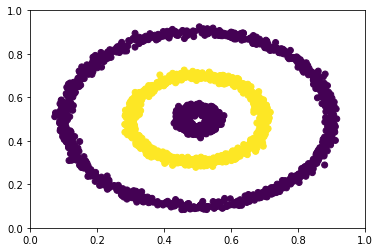

In [18]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)

### Regression 

In [19]:
size = 3000
low = -np.pi
high = np.pi
x = np.random.uniform(low, high, 2*size).reshape(size, -1)
y = np.sin((x[:,0])**2+x[:,1]**2)
x = (x-low)/(high-low)

(0.0, 1.0)

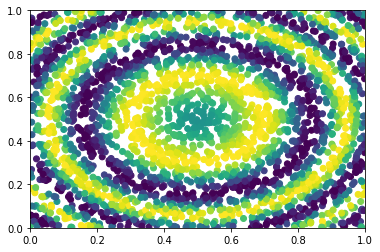

In [20]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)

In [21]:
np.min(x)

0.00025249648474167074

Text(0.5, 1.0, 'Original dataset')

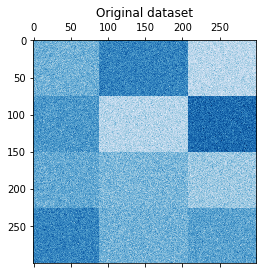

In [22]:

n_clusters = (4, 3)
data, rows, columns = sklearn.datasets.make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [23]:
X

NameError: name 'X' is not defined